In [1]:
import subprocess
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
%matplotlib inline

In [3]:
def main(data_dir, output_dir, output_file, plot_title, verbose=True, plot=True):

    # first move to data directory and create an Analysis folder to dump all the data
    # mmgbsa_parser.sh is called to extract all the data
    os.chdir(data_dir)
    print os.getcwd()
    subprocess.call(['bash', '/Users/gil_f.hoben/bin/mmpbsa_parser.sh'])

    complex_total = np.loadtxt('./Analysis/data._MMPBSA_complex_gb')
    receptor_total = np.loadtxt('./Analysis/data._MMPBSA_receptor_gb')
    ligand_total = np.loadtxt('./Analysis/data._MMPBSA_ligand_gb')
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    os.chdir(output_dir)
    
    print 'Output Directory: ', os.getcwd()

    if verbose:

        print 'Average complex Energy: %.2f kcal/mol' % complex_total.mean()
        print 'Average receptor Energy: %.2f kcal/mol' % receptor_total.mean()
        print 'Average ligand Energy: %.2f kcal/mol' % ligand_total.mean()

    # calculate delta total
    delta_total = complex_total - receptor_total - ligand_total

    if verbose:

        print 'Average Delta Total: %.2f kcal/mol' % delta_total.mean()
        print 'Standard Deviation of Delta Total: %.2f' % delta_total.std()

    names = ['Complex Contribution', 'Receptor Contribution', 'Ligand Contribution', '$\Delta$ Total']

    if plot:
        plt.figure(figsize=(12,12))
        plt.suptitle(plot_title, size = 22)
        for i,data in enumerate([complex_total, receptor_total, ligand_total, delta_total]):
            plt.subplot(2,2,i+1)
            plt.title(names[i], size=16)
            plt.plot(pd.rolling_mean(pd.DataFrame(data), 50), 
                label = 'Average = %.2f kcal/mol\nStandard deviation = %.2f' % (data.mean(), data.std()))
            plt.ylabel('kcal/mol', size =15)
            plt.xlabel('Frame number', size =15)
            plt.legend(prop={'size':8})
            plt.tight_layout()
            plt.subplots_adjust(hspace=0.2, top=.9)
        plt.plot()

/Users/gil_f.hoben/Troponin_md_processed/MD1/run1/free_energy
Output Directory:  /Users/gil_f.hoben/Troponin_md_processed/MD1/run1/free_energy/output
Average complex Energy: -41940.65 kcal/mol
Average receptor Energy: -41756.12 kcal/mol
Average ligand Energy: -154.24 kcal/mol
Average Delta Total: -30.29 kcal/mol
Standard Deviation of Delta Total: 4.59


/Users/gil_f.hoben/anaconda/envs/MDanalysis/lib/python2.7/site-packages/ipykernel/__main__.py:41: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=50,center=False).mean()


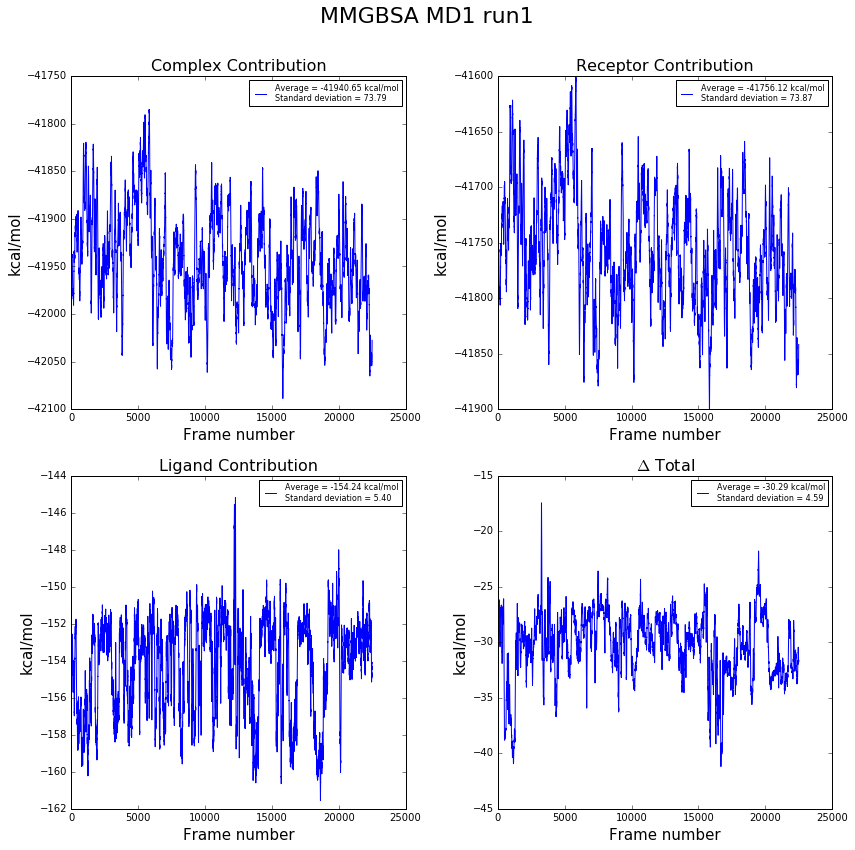

In [4]:
data_dir='/Users/gil_f.hoben/Troponin_md_processed/MD1/run1/free_energy/'
output_dir='/Users/gil_f.hoben/Troponin_md_processed/MD1/run1/free_energy/output'
output_file='MMGBSA_MD1_run1'
plot_title='MMGBSA MD1 run1'
main(data_dir, output_dir, output_file, plot_title)